![Dashboard]("Sales-Dashboard.png")

In [1]:
import pandas as pd
import numpy as np

In [2]:
data1= pd.read_csv(r"D:\Future Interns\Year 2009-2010.csv\Year 2009-2010.csv", 
                   encoding = 'unicode_escape', 
                   parse_dates = ['InvoiceDate'],
                   dtype={'CustomerID': str,'InvoiceNo': str})

In [3]:
data2= pd.read_csv(r"D:\Future Interns\Year 2010-2011.csv\Year 2010-2011.csv", 
                   encoding = 'unicode_escape', 
                   parse_dates = ['InvoiceDate'],
                   dtype={'CustomerID': str,'InvoiceNo': str})

In [4]:
data1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
data2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
len(data2)

541910

In [7]:
len(data1)

525461

In [8]:
data= pd.concat([data1,data2],ignore_index=True)

In [9]:
len(data)

1067371

In [10]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [11]:
data.duplicated().sum()

np.int64(34335)

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
len(data)

1033036

In [14]:
data_original=data.copy()

In [59]:
data_used=data_original.dropna(axis=0, subset=['Description'])

In [61]:
data_used.to_csv(r"D:\Future Interns\Data_used.csv",index=False)

In [15]:
len(data_original)

1033036

In [16]:
data.dropna(axis=0, subset=['Customer ID'], inplace=True)

In [17]:
data_segm=data

In [18]:
len(data_segm)

797885

In [19]:
# removing rows that have unit price equal to zero
clean_data= data[data["Price"]!= 0]

In [20]:
len(clean_data)

797815

In [21]:
# finding the canceled invoices that starts with letter C
len(clean_data[clean_data['Invoice'].str.startswith("C")])

18390

In [22]:
# removing the cancelled 
real_data=clean_data[~clean_data['Invoice'].str.startswith("C")]

In [62]:
# Saving the data with transaction data with no any cancelled transaction as real data with no cancels.
real_data1=data_used[~data_used['Invoice'].str.startswith("C")]

In [65]:
real_data1.to_csv(r"D:\Future Interns\real_data_with_no_cancels.csv", index=False)

In [23]:
len(real_data)

779425

In [24]:
cancelled_data=clean_data[clean_data['Invoice'].str.startswith("C")].copy()

In [66]:
cancelled_data1=data_used[data_used['Invoice'].str.startswith("C")].copy()

In [67]:
# saving cancelled transaction data only as cancelled data
cancelled_data1.to_csv(r"D:\Future Interns\cancelled_data.csv", index=False)

In [68]:
len(cancelled_data1)

19104

In [25]:
len(cancelled_data)

18390

In [26]:
cancelled_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


# cancellation analysis

In [27]:
# Revenue lost analysis
cancelled_data['Revenue_Lost'] = cancelled_data['Quantity'].abs() * cancelled_data['Price']


In [28]:
# cancelled quanity per product category
most_cancelled_product=cancelled_data.groupby('Description')['Quantity'].sum().abs().sort_values(ascending=False).head(10)

In [29]:
most_cancelled_product

Description
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         74494
ROTATING SILVER ANGELS T-LIGHT HLDR     9370
SET/6 FRUIT SALAD PAPER CUPS            7140
SET/6 FRUIT SALAD  PAPER PLATES         7008
Manual                                  5306
POP ART PEN CASE & PENS                 5184
BLACK SILVER FLOWER T-LIGHT HOLDER      5040
MULTICOLOUR SPRING FLOWER MUG           4996
TEATIME PEN CASE & PENS                 4632
Name: Quantity, dtype: int64

In [32]:
import matplotlib.pyplot as plt

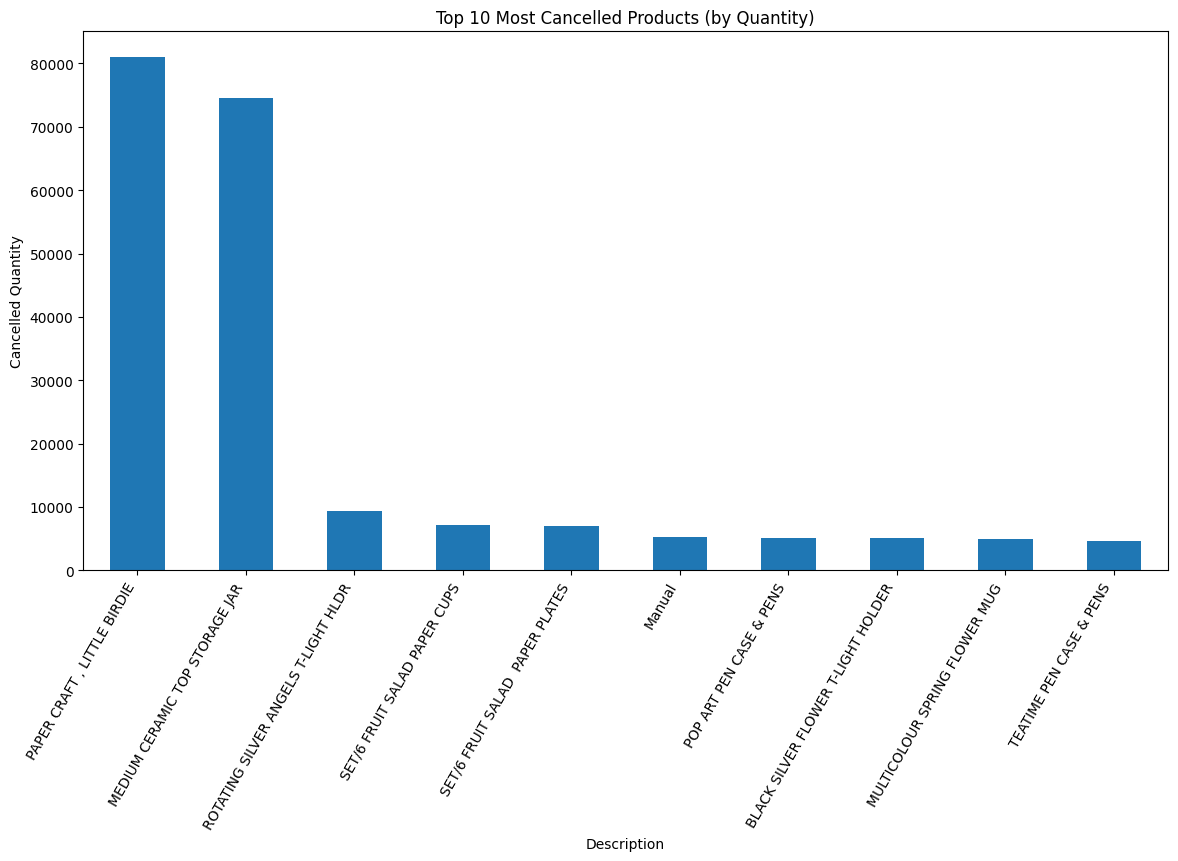

In [33]:
plt.figure(figsize=(14,7))
most_cancelled_product.plot(kind='bar')
plt.title("Top 10 Most Cancelled Products (by Quantity)")
plt.ylabel("Cancelled Quantity")
plt.xticks(rotation=60, ha='right')
plt.show()

In [ ]:
#cancellation rate of the products

In [34]:
total_qty = clean_data.groupby('Description')['Quantity'].sum().abs()
cancel_qty = cancelled_data.groupby('Description')['Quantity'].sum().abs()

cancel_rate = (cancel_qty / total_qty.replace(0, pd.NA)) * 100
cancel_rate = cancel_rate.dropna().sort_values(ascending=False).head(10)
cancel_rate


Description
RED POLKADOT PUDDING BOWL                   6080.0
MULTICOLOUR POLKADOT PLATE                  5700.0
SET OF 6 DOTS CHOPSTICKS                    4525.0
BLUE POLKADOT PUDDING BOWL             3670.588235
BLACK CHERRY LIGHTS                    2666.666667
MEDIUM CERAMIC TOP STORAGE JAR         2176.914085
ROSES ON BLUE TEACUP CANDLE                 1575.0
BLUE POLKADOT PURSE                         1375.0
WHITE CHERRY LIGHTS                    1016.190476
KISS REINDEER SCANDINAVIAN STOCKING          600.0
Name: Quantity, dtype: object

In [35]:
total_qty

Description
  DOORMAT UNION JACK GUNS AND ROSES     167
 3 STRIPEY MICE FELTCRAFT               660
 4 PURPLE FLOCK DINNER CANDLES          324
 50'S CHRISTMAS GIFT BAG LARGE         1883
 ANIMAL STICKERS                        385
                                       ... 
ZINC T-LIGHT HOLDER STARS SMALL        4850
ZINC TOP  2 DOOR WOODEN SHELF           231
ZINC WILLIE WINKIE  CANDLE STICK       6154
ZINC WIRE KITCHEN ORGANISER              25
ZINC WIRE SWEETHEART LETTER TRAY         80
Name: Quantity, Length: 5299, dtype: int64

In [36]:
cancel_qty

Description
 3 STRIPEY MICE FELTCRAFT             2
 50'S CHRISTMAS GIFT BAG LARGE        2
 Bank Charges                         1
 CHERRY BLOSSOM  DECORATIVE FLASK     3
 DOLLY GIRL BEAKER                    7
                                     ..
ZINC SWEETHEART WIRE LETTER RACK      4
ZINC T-LIGHT HOLDER STAR LARGE       11
ZINC T-LIGHT HOLDER STARS SMALL      44
ZINC TOP  2 DOOR WOODEN SHELF        11
ZINC WILLIE WINKIE  CANDLE STICK     12
Name: Quantity, Length: 3026, dtype: int64

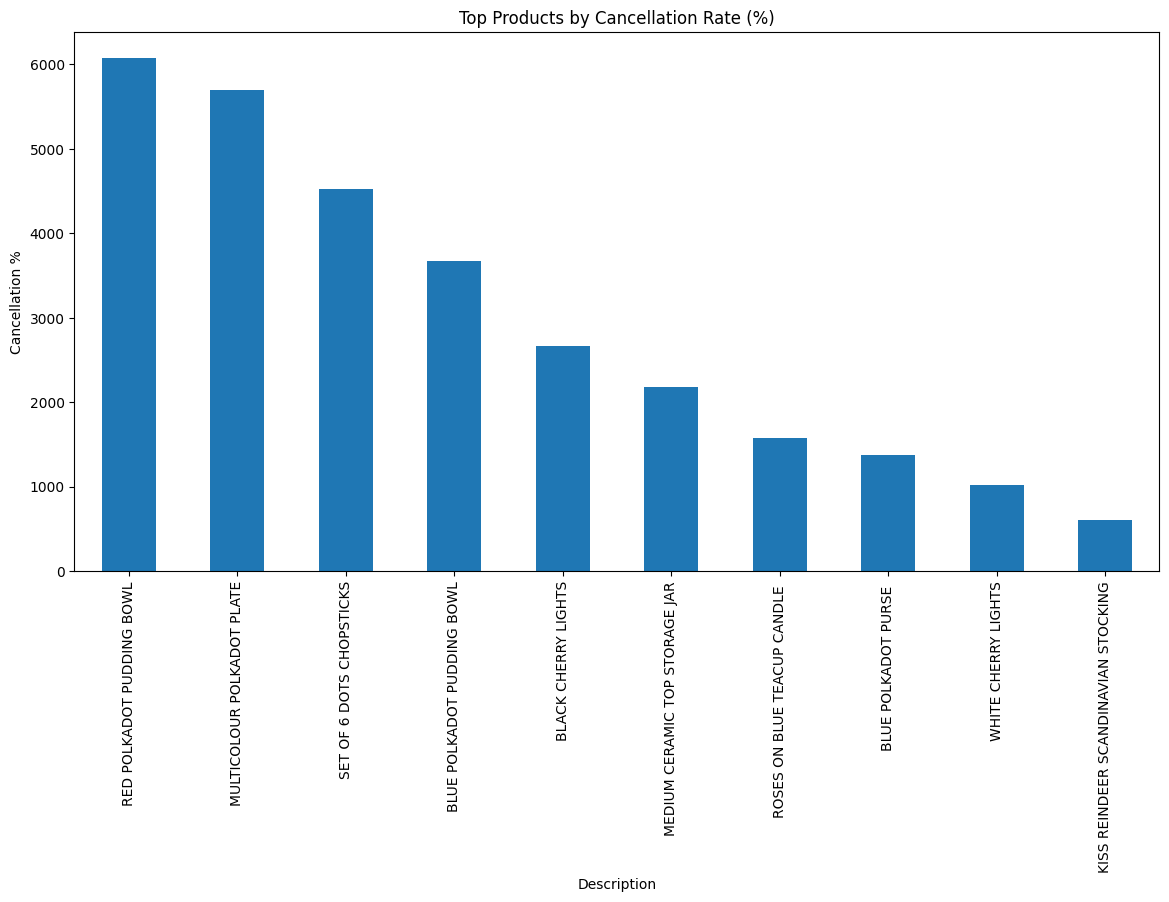

In [37]:
plt.figure(figsize=(14,7))
cancel_rate.plot(kind='bar')
plt.title("Top Products by Cancellation Rate (%)")
plt.ylabel("Cancellation %")
plt.show()

In [38]:
normal_sales = clean_data[~clean_data['Invoice'].astype(str).str.startswith('C')] \
                .groupby('Description')['Quantity'].sum().abs()

cancel_sales = cancelled_data.groupby('Description')['Quantity'].sum().abs()


In [39]:
pure_loss_products = cancel_sales[normal_sales.reindex(cancel_sales.index).fillna(0) == 0]
pure_loss_products = pure_loss_products.sort_values(ascending=False)
pure_loss_products


Description
CRUK Commission                        16
SET 6 MINI SUSHI SET FRIDGE MAGNETS    12
VINTAGE BLUE VACUUM FLASK 0.5L         10
WHITE ORCHID FLOWER LIGHTS              6
SET OF KITCHEN WALL  STICKERS           4
LARGE GLASS HEART TRINKET POT           4
HAND OPEN SHAPE CHROME                  3
Adjustment by Peter on 24/05/2010 1     3
S/4 HEART CRYSTAL FRIDGE MAGNETS        3
PINK EAR MUFF HEADPHONES                3
ENGLISH ROSE DESIGN KITCHEN APRON       2
PURPLE ORCHID FLOWER LIGHTS             2
VINTAGE WOOD ORGANISER                  2
BLUE GREEN CHRISTMAS HANGING BALL       1
LARGE SILVER BALUSTRADE CANDLESTICK     1
ZINC HEART HANGER WITH HOOKS            1
Name: Quantity, dtype: int64

In [40]:
pure_loss_value = cancelled_data[cancelled_data['Description'].isin(pure_loss_products.index)] \
                    .groupby('Description')['Revenue_Lost'].sum().sort_values(ascending=False)

pure_loss_value


Description
CRUK Commission                        7933.43
Adjustment by Peter on 24/05/2010 1     731.05
VINTAGE BLUE VACUUM FLASK 0.5L           67.50
WHITE ORCHID FLOWER LIGHTS               45.30
VINTAGE WOOD ORGANISER                   33.90
SET 6 MINI SUSHI SET FRIDGE MAGNETS      20.28
LARGE GLASS HEART TRINKET POT            17.00
PURPLE ORCHID FLOWER LIGHTS              15.90
PINK EAR MUFF HEADPHONES                 14.79
ENGLISH ROSE DESIGN KITCHEN APRON        11.90
SET OF KITCHEN WALL  STICKERS            11.80
HAND OPEN SHAPE CHROME                   10.17
LARGE SILVER BALUSTRADE CANDLESTICK       5.95
S/4 HEART CRYSTAL FRIDGE MAGNETS          4.95
ZINC HEART HANGER WITH HOOKS              4.25
BLUE GREEN CHRISTMAS HANGING BALL         0.19
Name: Revenue_Lost, dtype: float64

# loss revenue by country

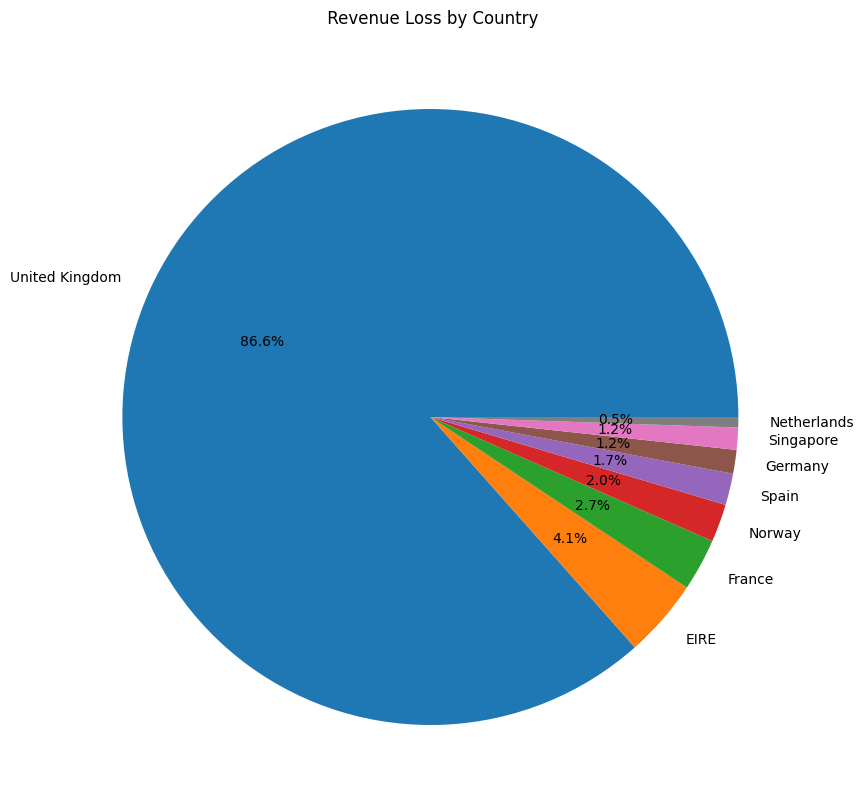

In [41]:
country_loss = cancelled_data.groupby('Country')['Revenue_Lost'].sum().sort_values(ascending=False).head(8)

plt.figure(figsize=(10,10))
plt.pie(country_loss, labels=country_loss.index, autopct='%1.1f%%')
plt.title(" Revenue Loss by Country")
plt.show()


In [42]:
# adding the Sales column
real_data["Sales"]=real_data["Price"] * real_data["Quantity"]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23664\385909879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data["Sales"]=real_data["Price"] * real_data["Quantity"]


In [43]:
reference_date = real_data['InvoiceDate'].max() + pd.Timedelta(days=1)


In [44]:
# calculating recency, frequency, and monetary value
rfm = real_data.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'Invoice': 'nunique',                                    # Frequency
    'Sales': 'sum'                                             # Monetary
}).reset_index()
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']


In [45]:
rfm

,Customer ID,Recency,Frequency,Monetary
0,12346.0,326,12,77556.46
1,12347.0,2,8,4921.53
2,12348.0,75,5,2019.40
3,12349.0,19,4,4428.69
4,12350.0,310,1,334.40
...,...,...,...,...
5873,18283.0,4,22,2664.90
5874,18284.0,432,1,461.68
5875,18285.0,661,1,427.00
5876,18286.0,477,2,1296.43


In [46]:
# Recency → lower is better, so we reverse the labels
rfm['R_Score'] = pd.qcut(rfm['Recency'].rank(method='first'), 5, labels=[5,4,3,2,1]).astype(int)

# Frequency → higher is better
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)

# Monetary → higher is better
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)


In [47]:
rfm.head()

,Customer ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,12346.0,326,12,77556.46,2,5,5
1,12347.0,2,8,4921.53,5,4,5
2,12348.0,75,5,2019.40,3,4,4
3,12349.0,19,4,4428.69,5,3,5
4,12350.0,310,1,334.40,2,1,2


In [49]:
def segment_customer(row):
    R = row['R_Score']
    F = row['F_Score']
    M = row['M_Score']
    
    # Champions → very recent, frequent, and high-spending customers
    if R >= 4 and F >= 4 and M >= 4:
        return 'Champions'
    
    # Loyal → valuable and engaged customers, high to moderate scores
    elif (R >= 3 and F >= 3) or (R >= 4 and M >= 4) or (F >= 4 and M >= 4):
        return 'Loyal'
    
    # Recent → purchased recently, medium frequency/spend
    elif (R >= 4 and F >= 2) or (R >= 3 and M >= 3):
        return 'Recent'
    
    # Needs attention → used to buy but not recently, moderate spend
    elif (R >= 2 and F >= 2) or (M >= 3):
        return 'Needs attention'
    
    # At risk → not purchased recently and/or low spend
    elif (R <= 2 and F <= 2) or (M <= 2):
        return 'At risk'
    
    # Inactive → lapsed customers, very low engagement and spend
    else:
        return 'Inactive'


In [50]:
rfm['Segment'] = rfm.apply(segment_customer, axis=1)

In [51]:
segments_counts=rfm.groupby('Segment').agg({'Customer ID':'count'})

In [52]:
segments_counts

,Customer ID
Segment,
At risk,1427
Champions,1289
Loyal,1662
Needs attention,1129
Recent,371


In [53]:
import matplotlib.pyplot as plt

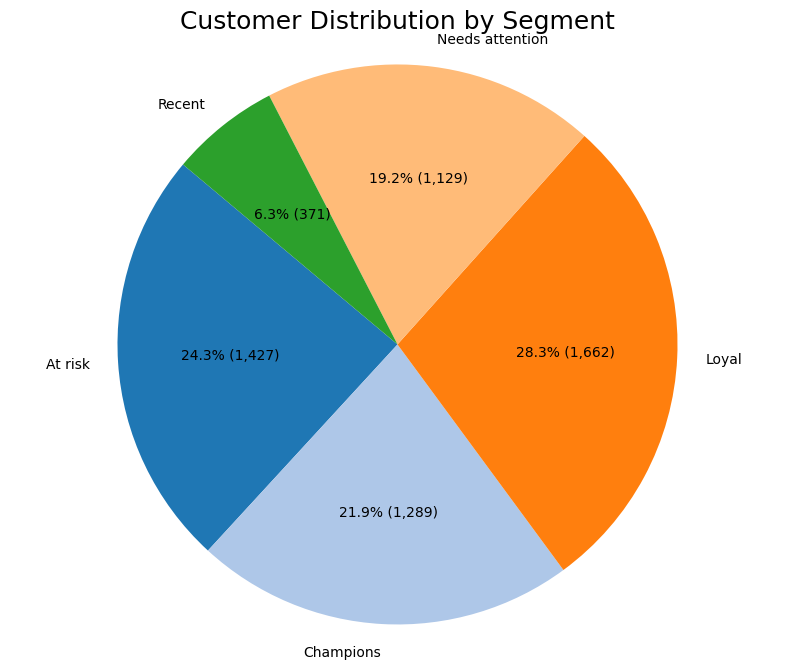

In [54]:

# Use your exact grouped data
labels = segments_counts.index             # Segment names
sizes = segments_counts['Customer ID']     # Counts per segment

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes,
        labels=labels,
        autopct=lambda p: '{:.1f}% ({:,.0f})'.format(p, p * sum(sizes)/100),
        startangle=140,
        colors=plt.cm.tab20.colors)

plt.title('Customer Distribution by Segment', fontsize=18)
plt.axis('equal')  # Ensure pie is a circle
plt.show()


In [55]:
segments_summary = rfm[['Recency','Frequency','Monetary','Segment']].groupby('Segment').agg({'mean','std','max','min'})

In [56]:
segments_summary

Recency                             Frequency                 \
                    max         std min        mean       max        std min   
Segment                                                                        
At risk             739  218.624270   1  408.897687         8   0.535835   1   
Champions            59   15.746791   1   19.719162       398  23.685656   4   
Loyal               692  112.043304   1  106.743682       155   5.795855   1   
Needs attention     738  132.640281  59  335.467671         9   1.336171   1   
Recent              179   41.580490   1   49.495957         2   0.468425   1   

                             Monetary                                      
                      mean        max           std      min         mean  
Segment                                                                    
At risk           1.178697     608.86    141.330602     2.95   252.739125  
Champions        17.146625  580987.04  29201.681366  1224.06  9169.609678  
Loyal             5.873045  168472.50   5832.077842    30.95  2353.865769  
Needs attention   2.481842   44534.30   1673.950338     3.75   903.423774  
Recent            1.676550    5416.32    609.200131    20.80   707.353943

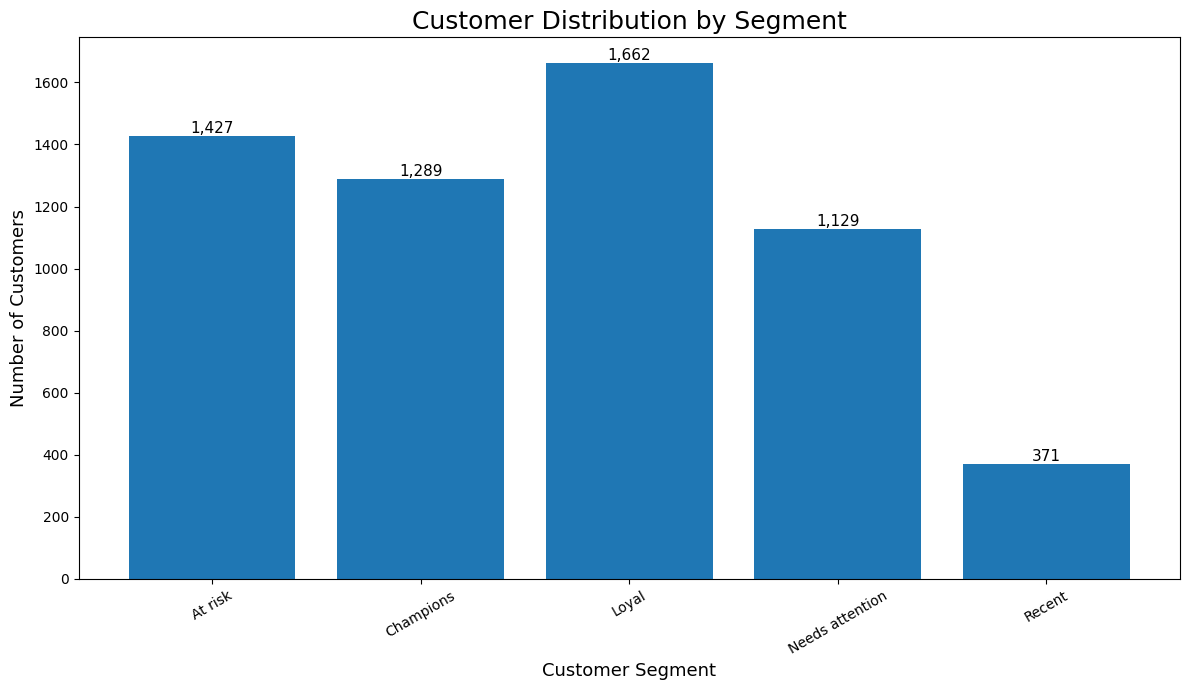

In [57]:
# Use your exact grouped data
labels = segments_counts.index                 # Segment names
sizes = segments_counts['Customer ID']         # Counts per segment

plt.figure(figsize=(12, 7))

bars = plt.bar(labels, sizes)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             f'{int(height):,}',
             ha='center',
             va='bottom',
             fontsize=11)

plt.title('Customer Distribution by Segment', fontsize=18)
plt.xlabel('Customer Segment', fontsize=13)
plt.ylabel('Number of Customers', fontsize=13)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
